# 2 - Introduction to Optimization and the Gradient Descent Algorithm

## How a machine learns

Machine learning techniques follow three steps to reach their solution:
- **Make a prediction** - this step involves predicting the coefficients in a function. First predictions are typically like random guesses.
- **Calculate error** - measure how good the prediction was.
- **Learn** - the step where the initial prediction was adjusted. Change the initial prediction based on the error.

After the Learn step, the machine loops back to predict using the new coefficients, calculating the errors, and adjust the prediction in the learn step. Repeat and slowly learn to obtain the least amount of error.

## Cost Functions

A major part of a machine learning process involves optimizing for a solution that has the lowest cost. An example of a cost function is the Residual Sum of Squares, with the formula given below:

- For a given linear regression equation:  

### $$ h_\theta(x) = \theta_0 + \theta_1 x $$  

- Find the optimal values of $\theta_0$ and $\theta_1$ to minimize the Residual Sum of Squares given below:

### $$ \text{RSS} = \sum_{i=1}^{n} \left( y_i - h_\theta(x_i) \right)^2 $$

## Example 1: Simple Cost Function

### $$ f(x) = x^2 + x + 1 $$

### Imports and Packages

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Code to display matplotlib inside the notebook - not in a separate web page
%matplotlib inline

### Defining Functions and Generating Data

In [10]:
# Make a function
def f(x):
    return x**2 + x + 1

In [11]:
# Generate data
x_1 = np.linspace(start=-3, stop=3, num=100) 

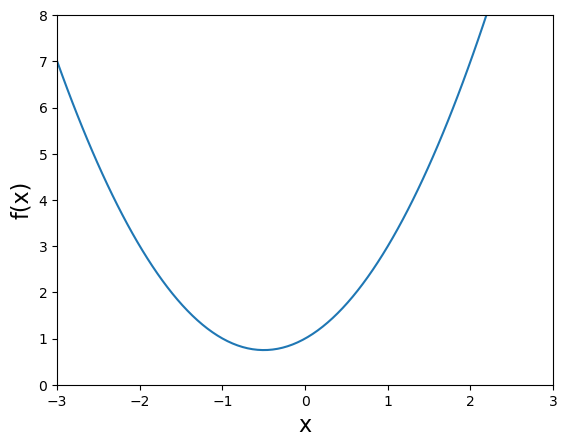

In [12]:
# Plot the function
y_1 = f(x_1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, y_1)
plt.show()

Let's observe the value at x = 2. At the point, the cost is still decreasing a lot. At x = 1, the cost is still decreasing - but not a lot. Going down further to about -0.5, the cost seems to have reached the minimum, and it seems not to go down even further. Going to x = -1, the cost now becomes higher. The slope or steepness of the function indicates when the minimum cost was reached. When slope stops changing, the cost reached the lowest value.  

### Slope and Derivatives

In [15]:
# Create a function for derivative of f(x)
def df(x):
    return 2*x + 1

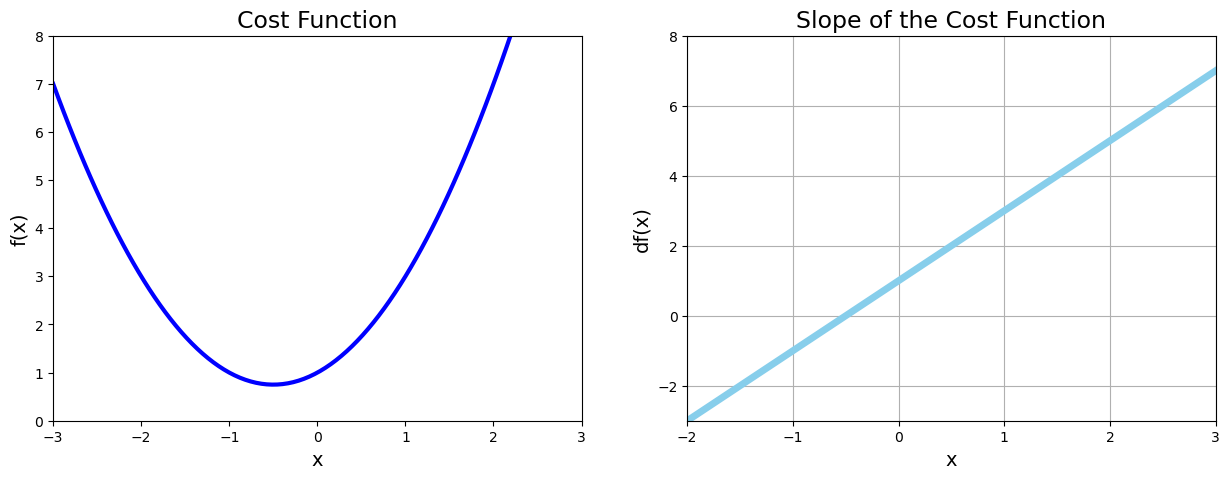

In [16]:
# Plot f(x) and df(x)

y_1 = f(x_1)
 
# First plot - f(x): Cost Function
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.plot(x_1, y_1, color='blue', linewidth=3)

# Second plot - df(x): Derivative
plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim(-3, 8)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('df(x)', fontsize=14)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
plt.grid()

plt.show()

### Gradient Descent Algorithm

Gradient descent is an optimization algorithm used to find the minimum of a function. In machine learning, it’s how models “learn” the best parameters to minimize error or loss.

Think of gradient descent as a way to find the lowest point in a mountainous landscape (the minimum of a function). Imagine standing somewhere on the mountain slope, and you want to reach the valley. Gradient descent tells you:
- Which direction to move
- How big of a step to take

The Gradient Descent Formula is as follows:

#### $$\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla L(\theta_{\text{old}})$$

In [19]:
# Gradient Descent

current_x = 0           # temporary value
new_x = 3               # starting point (initial guess)
learning_rate = 0.1     # learning rate (too big causes overshoot, too low might take too long)
precision = 0.00001     # how precise answer should be

# python lists to store data
x_list = [new_x]
y_list = [f(new_x)]
slope_list = [df(new_x)]

for n in range(1000):
    # 1 - predict: let previous_x be the initial guess
    previous_x = new_x

    # 2 - calculate the error: this function gets the slope at previous_x
    slope = df(previous_x)

    # 3 - learn: sets new value of x after considering the error
    new_x = previous_x - learning_rate * slope    # This is the core gradient descent formula

    # Add values to the python list for plotting
    x_list.append(new_x)
    y_list.append(f(new_x))
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        break

print(f"> Local minimum occurs at: {new_x}\n> Slope at x = {new_x} is: {df(new_x)}\n> f(x) or cost at this point is: {f(new_x)} \n> Loop ran: {n} times")

> Local minimum occurs at: -0.49996003706460423
> Slope at x = -0.49996003706460423 is: 7.992587079153068e-05
> f(x) or cost at this point is: 0.7500000015970362 
> Loop ran: 50 times


#### Visualizing the Gradient Descent Algorithm for Example 1

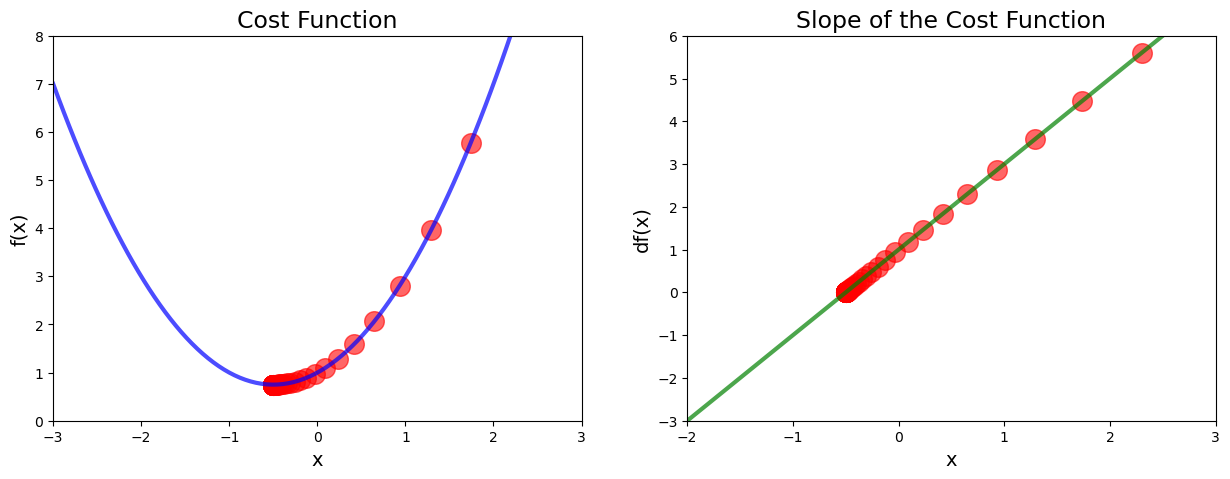

In [21]:
plt.figure(figsize=[15, 5])

# 1 - Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.plot(x_1, y_1, color='blue', linewidth=3, alpha=0.7)
plt.xlabel('x', fontsize=14)
plt.xlim(-3, 3)
plt.ylabel('f(x)', fontsize=14)
plt.ylim(0, 8)
plt.scatter(x_list, y_list, color='red', s=200, alpha=0.6)


# 2 - Slope of the Cost Function
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.xlim(-2, 3)
plt.ylabel("df(x)", fontsize=14)
plt.ylim(-3, 6)
plt.scatter(x_list, slope_list, color='red', s=200, alpha=0.6)
plt.plot(x_1, df(x_1), color='green', linewidth=3, alpha=0.7)


plt.show()

## Example 2 - Multiple Minima

### $$ g(x) = x^4 - 4x^2 + 5 $$

### Defining Functions and Generating Data

In [24]:
# Generate Data
x_2 = np.linspace(-2, 2, 1000)

In [25]:
# Make g(x) function
def g(x):
    return x**4-4*x**2+5

# Make dg(x) function
def dg(x):
    return 4*x**3-8*x

### Visualizing the functions

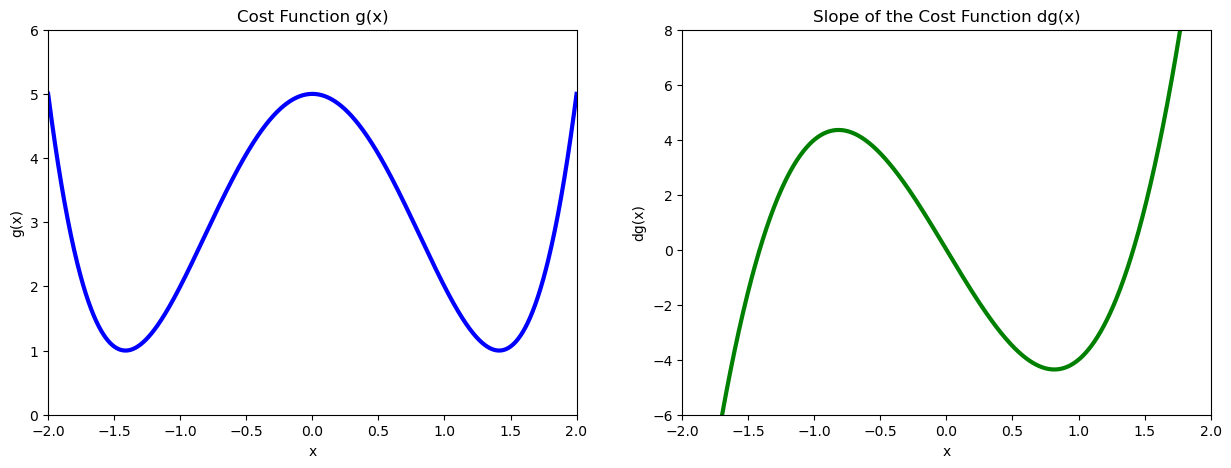

In [27]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.title('Cost Function g(x)')
plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.xlabel('x')
plt.ylabel('g(x)')


plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function dg(x)')
plt.plot(x_2, dg(x_2), color='green', linewidth=3)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.xlabel('x')
plt.ylabel('dg(x)')

plt.show()

### Gradient Descent Algorithm

In [29]:
# Create a function that employs gradient descent algorithm
def gradient_descent(derivative_function, initial_guess, learning_rate=0.02, precision=0.0001, max_iter=300):
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_function(new_x)]

    for n in range(max_iter):
        previous_x = new_x 
        gradient = derivative_function(new_x)

        # Core Gradient Descent formula
        new_x = previous_x - learning_rate * gradient

        # Add values into the lists
        x_list.append(new_x)
        slope_list.append(derivative_function(new_x))
        
        difference = abs(new_x-previous_x)
        if difference < precision:
            break
    
    x_array = np.array(x_list)
    
    return new_x, x_array, slope_list, n+1

#### Output

The output to the gradient descent function is a **tuple**. A tuple is sort of similar to a list, but cannot be changed or modified once created.

#### Calling the Function

The Gradient Descent Algorithm Function **requires** the following inputs:
- **derivative_function**: a function that returns the derivative of the original function
- **initial_guess**: initial value or starting point

The Gradient Descent Algorithm Function has the following **optional** inputs:
- **learning_rate**: the rate at which the machine learns; too high causes overshoot and too low causes significant delays (default value = 0.002)
- **precision**: the difference between the initial guess and the local minimum (the lower the difference, the better; default value = 0.0001)
- **max_iter**: the maximum times the loop will run (too high causes overshoot on diverging functions; default value = 300)

In [32]:
local_min, x_array, deriv_list, n = gradient_descent(derivative_function=dg, initial_guess=1.8, learning_rate=0.01)

### Visualizing Gradient Descent Algorithm

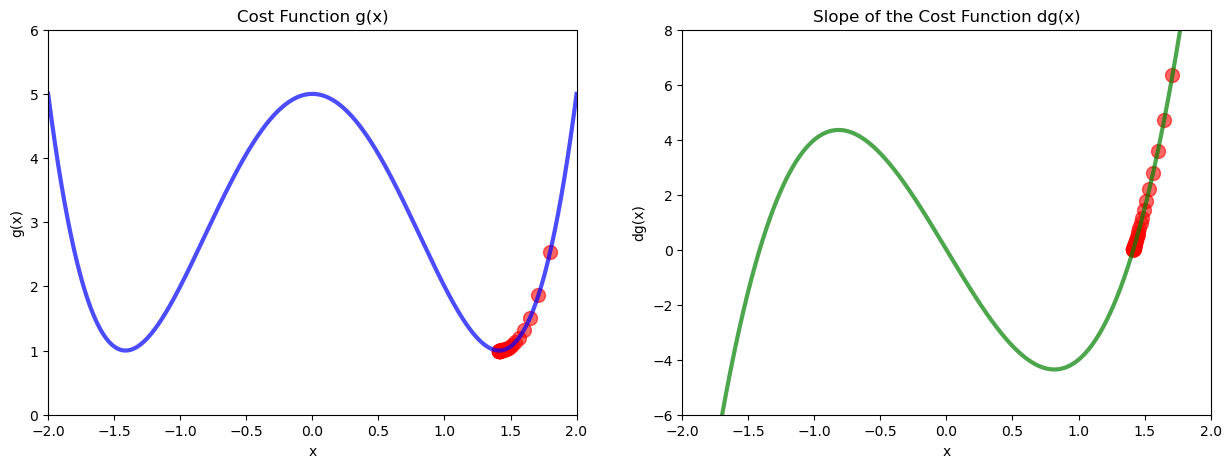

In [34]:
plt.figure(figsize=[15, 5])

# Cost function
plt.subplot(1, 2, 1)
plt.title('Cost Function g(x)')
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.7)
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.xlabel('x')
plt.ylabel('g(x)')

plt.scatter(x_array, g(x_array), color='red', alpha=0.6, s=100)

# Slope of the Cost function
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function dg(x)')
plt.plot(x_2, dg(x_2), color='green', linewidth=3, alpha=0.7)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.xlabel('x')
plt.ylabel('dg(x)')

plt.scatter(x_array, deriv_list, color='red', alpha=0.6, s=100)


plt.show()

Functions like these can have multiple minima and/or multiple maxima. Which is why the result of gradient descent may vary depending on the initial guess for the parameters. It is important to note that functions that has both global and local minima or maxima can pose challenges for optimization. For instance, if the initial guess starts to the right of a local minimum and the optimization follows the gradient direction, the algorithm might converge to the local minimum instead of discovering the global minimum. A common solution is to test multiple starting points and run the gradient descent algorithm several times, or to explore alternative optimization methods designed to escape local minima.

## Example 3 - Divergence

### $$ h(x) = x^5 - 2x^4 + 2 $$

### Defining Functions and Generating Data

In [38]:
# Generate Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

In [39]:
# Defining h(x)
def h(x):
    return x**5 - 2*x**4 + 2

# Defining dh(x)
def dh(x):
    return 5*x**4 - 8*x**3

### Gradient Descent Algorithm

In [41]:
# Calling the Gradient Descent Algorithm Function Above
local_min, x_array, deriv_list, num_loops = gradient_descent(derivative_function=dh, initial_guess=0.2) 

### Visualizing Gradient Descent Algorithm

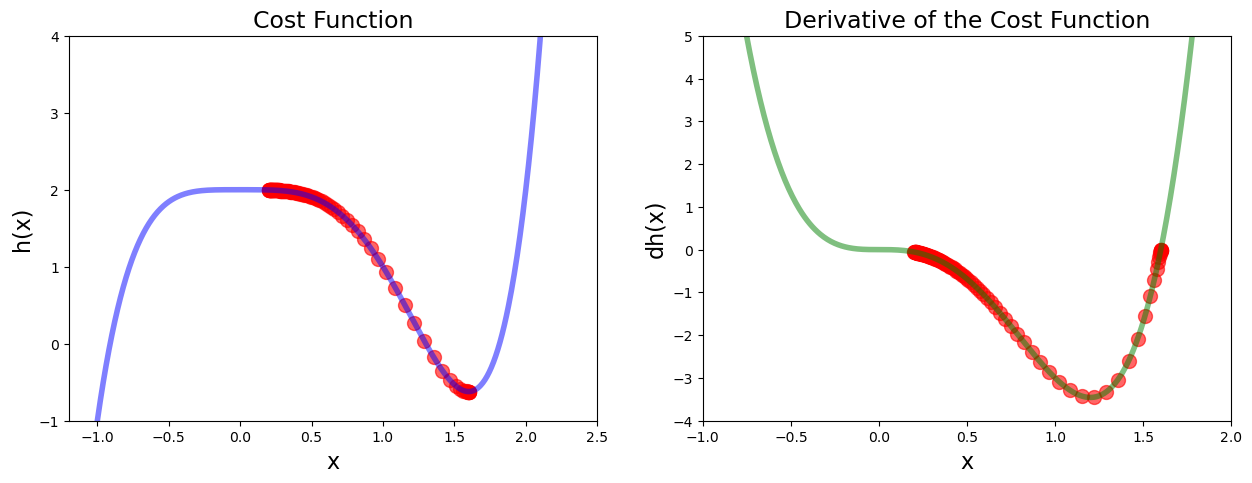

In [43]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), linewidth=4, alpha=0.5, color='blue')
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.scatter(x_array, h(x_array), color='red', s=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title('Derivative of the Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3, dh(x_3), color='green', linewidth=4, alpha=0.5)
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.scatter(x_array, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

Functions like the given h(x) can cause divergence, particularly when setting the initial_guess to -0.2, so the use of limiters such as max_iter is helpful to prevent overflow. This example works up to `max_iter=71` (depending on the device) until it causes overflow. 

## Gradient Descent Learning Rate

The Gradient Descent Algorithm Learning Rate (often denoted as gamma, $ \gamma $) refers to how much the model’s parameters are adjusted in response to the estimated error each time the model weights are updated. Simply put, it shows how big of a step is taken in each update while minimizing the loss function.

### Visualizing the Learning Rate

In [47]:
# Calling the Gradient Descent Algorithm Function Above
local_min, x_array, deriv_list, num_loops = gradient_descent(derivative_function=dh, initial_guess=0.2) 

#### Recall that:
- x_array: refers to the list of the values of x at a specific iteration
- num_loops: number of times the loop is iterated


#### Setup
To visualize the effect of Learning Rate value on the Gradient Descent Algorithm, let's make everything else the same and only change the learning rate. It would be useful to represent the behavior of the function as the rate by how fast it finds or calculates the minimum cost of a function. The setup will have the following values:
- Low Gamma: `learning_rate=0.0005`
- Mid Gamma: `learning_rate=0.001`
- High Gamma: `learning_rate=0.002`
- Extreme Gamma: `learning_rate=1`

#### Setting Up Values

In [51]:
# For this plotting, num_loops and x_array are the only thing needed

# Low Gamma
low_result = gradient_descent(derivative_function=dg, initial_guess=3, learning_rate=0.0005, precision=0.0001, max_iter=200)
low_y = low_result[1]
low_x = list(range(low_result[3] + 1))

# Mid Gamma
mid_result = gradient_descent(derivative_function=dg, initial_guess=3, learning_rate=0.001, precision=0.0001, max_iter=200)
mid_y = mid_result[1]
mid_x = list(range(mid_result[3] + 1))

# High Gamma
high_result = gradient_descent(derivative_function=dg, initial_guess=3, learning_rate=0.002, precision=0.0001, max_iter=200)
high_y = high_result[1]
high_x = list(range(high_result[3] + 1))

# Extreme Gamma
extreme_result = gradient_descent(derivative_function=dg, initial_guess=1.9, learning_rate=0.2, precision=0.0001, max_iter=200)
extreme_y = extreme_result[1]
extreme_x = list(range(extreme_result[3] + 1))

#### Plotting the Setup

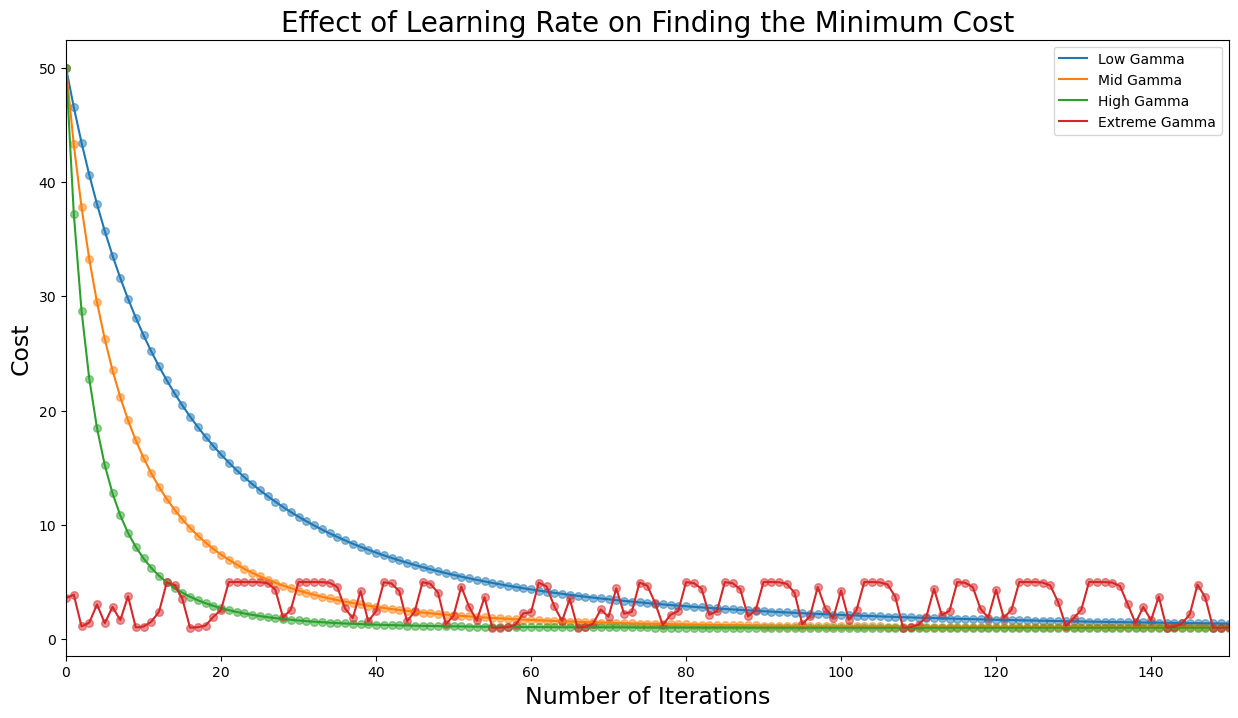

In [53]:
plt.figure(figsize=[15, 8])

plt.title('Effect of Learning Rate on Finding the Minimum Cost', fontsize=20)
plt.xlim(0, 150)
plt.xlabel('Number of Iterations', fontsize=17)
plt.ylabel('Cost', fontsize=17)

# Low Gamma Plot
plt.plot(low_x, g(low_y), label='Low Gamma')
plt.scatter(low_x, g(low_y), s=30, alpha=0.5)

# Mid Gamma Plot
plt.plot(mid_x, g(mid_y), label='Mid Gamma')
plt.scatter(mid_x, g(mid_y), s=30, alpha=0.5)

# High Gamma Plot
plt.plot(high_x, g(high_y), label='High Gamma')
plt.scatter(high_x, g(high_y), s=30, alpha=0.5)

# Extreme Gamma Plot
plt.plot(extreme_x, g(extreme_y), label='Extreme Gamma')
plt.scatter(extreme_x, g(extreme_y), s=30, alpha=0.5)

plt.legend()
plt.show()

The plotted results illustrate how the choice of learning rate impacts the performance of the Gradient Descent algorithm in minimizing the cost function. A low learning rate (Low Gamma) results in a slow but steady descent, requiring many iterations to approach the minimum cost. A high learning rate (High Gamma) converges more rapidly toward the minimum cost but has a higher risk of oscillations or overshooting if set too high, as seen in the Extreme Gamma case. The mid learning rate (Mid Gamma) strikes a balance, achieving convergence more quickly than a low rate while maintaining stability. As a result, selecting an appropriate learning rate is important for efficient optimization, as it directly affects how fast and how reliably the algorithm reaches the minimum cost.

## Example 4 - 3D Visualization

### $$ f(x,y) = \frac{1}{3^{-x^2-y^2}+1} $$

### Import additional requirements

In [57]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

### Defining Functions and Generating Data

In [59]:
# Define Function
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

# Generate Data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

# The library for creating 3D plots require a 2-dimensional array whereas x_4 and y_4 are only 1D.
x_4, y_4 = np.meshgrid(x_4, y_4)

### Visualizing 3D Objects

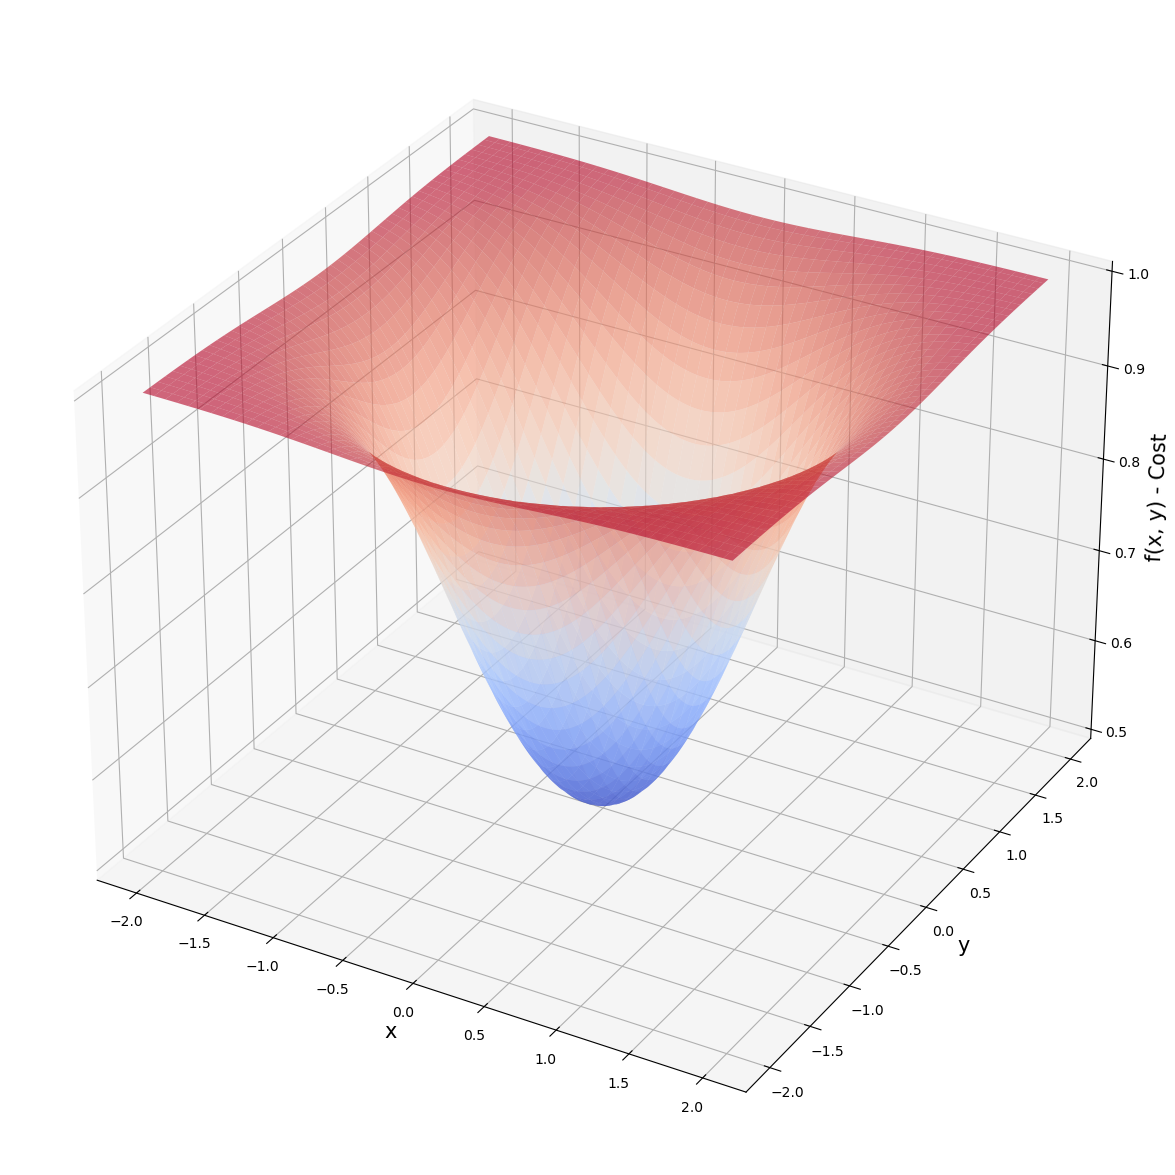

In [61]:
fig = plt.figure(figsize=[15, 15])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('f(x, y) - Cost', fontsize=15)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)

plt.show()

### Partial Derivatives and Symbolic Computation

In [63]:
# Import sympy

# symbols: helps to write math function; diff: helps to differentiate a function
from sympy import symbols, diff

In [64]:
# Using symbols
a, b = symbols('x, y')

The code snippet above means that `symbols('x, y')` makes symbolic variables `x` and `y`. Where:
- a is a symbolic object representing `x`
- b is a symbolic object representing `y`

In [66]:
# Create a symbolic function based on f(x, y) and use symbolic variables a & b  
cost_f_sym = f(a, b)

In [67]:
# Differentiate f(x, y) with respect to x then y using sympy

# Partial derivative with respect to x
pd_cfm_wrtx = diff(cost_f_sym, a)

# Partial derivative with respect to y
pd_cfm_wrty = diff(cost_f_sym, b)

print('Partial derivative of f(x, y) with respect to x: ', pd_cfm_wrtx)
print('Partial derivative of f(x, y) with respect to y: ', pd_cfm_wrty)

Partial derivative of f(x, y) with respect to x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative of f(x, y) with respect to y:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


### Partial Derivatives of $f(x, y)$

#### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

#### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [68]:
# Evaluating the cost function at a specific value of x and y
print('f(1.8, 1.0) = ' + str(f(a, b).evalf(subs={a: 1.8, b:1.0})))

f(1.8, 1.0) = 0.990604794032582


In [69]:
# The slope w.r.t. x at x = 1.8 & y = 1.0
pd_cfm_wrtx.evalf(subs={a:1.8, b:1.0})

0.0368089716197505

### Applying Gradient Descent on $f(x, y)$

In [71]:
# Gradient descent formula
# new_x = Previous_x - learning_rate * gradient

learning_rate = 0.1
max_iter = 500
# Set initial guess for x and y
parameters = np.array([1.8, 1.0])

for n in range(max_iter):
    slope_x = pd_cfm_wrtx.evalf(subs={a:parameters[0], b:parameters[1]})
    slope_y = pd_cfm_wrty.evalf(subs={a:parameters[0], b:parameters[1]})
    slope_xy = np.array([slope_x, slope_y])

    parameters = parameters - learning_rate * slope_xy

print(f"Values in gradient array: {slope_xy}")
print(f"Minimum cost occurs at x = {parameters[0]}")
print(f"Minimum cost occurs at y = {parameters[1]}")
print(f"The minimum cost is: {f(parameters[0], parameters[1])}")

Values in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum cost occurs at x = 3.45838599885832E-11
Minimum cost occurs at y = 1.92132555492129E-11
The minimum cost is: 0.500000000000000


Using symbolic functions may take some time to run the code since the function `diff()` is being run in each iteration. To minimize run time, create functions that clearly define the partial derivatives instead of calculating it using sympy. 

In [74]:
# Define functions
from math import log

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [135]:
learning_rate = 0.1
params = np.array([1.8, 1.0])
max_iter = 500

for i in range(max_iter):
    slope_x = fpx(params[0], params[1])
    slope_y = fpy(params[0], params[1])
    slopexy = np.array([slope_x, slope_y])

    params = params - slopexy * learning_rate

print(f"Values in gradient array: {slopexy}")
print(f"Minimum cost occurs at x = {params[0]}")
print(f"Minimum cost occurs at y = {params[1]}")
print(f"The minimum cost is: {f(params[0], params[1])}")

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum cost occurs at x = 3.458385998858304e-11
Minimum cost occurs at y = 1.9213255549212797e-11
The minimum cost is: 0.5


This solution works very fast since it already uses predefined functions instead of computing for the partial derivative function. For more complex functions, it would be more efficient to use sympy's `lambdify()` function to turn symbolic functions into a Python function. 

In [138]:
# Using lamdify requires importing
from sympy import lambdify

# Gradient descent formula
# new_x = Previous_x - learning_rate * gradient

learning_rate = 0.1
max_iter = 500
# Set initial guess for x and y
parameters = np.array([1.8, 1.0])

# lambdify the symbolic functions
fpx_func = lambdify((a, b), pd_cfm_wrtx, modules='numpy')
fpy_func = lambdify((a, b), pd_cfm_wrty, modules='numpy')

for n in range(max_iter):
    slope_x = fpx_func(parameters[0], parameters[1])
    slope_y = fpy_func(parameters[0], parameters[1])
    slope_xy = np.array([slope_x, slope_y])

    parameters = parameters - learning_rate * slope_xy

print(f"Values in gradient array: {slope_xy}")
print(f"Minimum cost occurs at x = {parameters[0]}")
print(f"Minimum cost occurs at y = {parameters[1]}")
print(f"The minimum cost is: {f(parameters[0], parameters[1])}")

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum cost occurs at x = 3.458385998858304e-11
Minimum cost occurs at y = 1.9213255549212797e-11
The minimum cost is: 0.5
